## Steps
- Import libraries
- Import the dataset
- Perform the Data Analysis (DM, DC, DE, DV, EDA)
- Data Preprocessing - Feature Engineering (Encoders, Scaling, Feature Importance/Selection, Hyper Parameter Tuning, etc.)
- Splitting of Data into sets - CV
- Model Selection
- Train the model
- Test the model
- Performance metric - Confusion matrix, accuracy_score

In [1]:
# PANDAS PROFILING -> Reduces 70% to 80% of the burden without code
# Youtube video -> pandas profiling by code with harry

In [2]:
# Import Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import re
from sklearn.model_selection import KFold, StratifiedKFold, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier

import warnings
warnings.filterwarnings('ignore')

In [3]:
# Importing the Dataset
df = pd.read_csv('creditcard.csv')

## EDA (Exploratory Data Analysis) :
- head() : Understand your data using the head() function to look at the first few rows.
- shape() : Review the dimensions of your data with the shape property.
- info() : To know the information aboutvthe data
- Dtyes : Look at the data types for each attribute with the dtypes property.
- describe : Review the distribution of your data with the describe() function.
- Correlation  : Calculate pairwise correlation between your variables using the corr() function.

In [4]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
df.shape

(284807, 31)

In [7]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [8]:
df.isnull().sum().sum()

0

# Visualizing the Null Values for Each Attribute

`missingno` is a Python library for the exploratory visualization of missing data. The above code visualizes the missing values in each attribute (column) of the DataFrame `df`.

If the bar chart shows no missing values, it indicates that there are no missing data in the dataset.

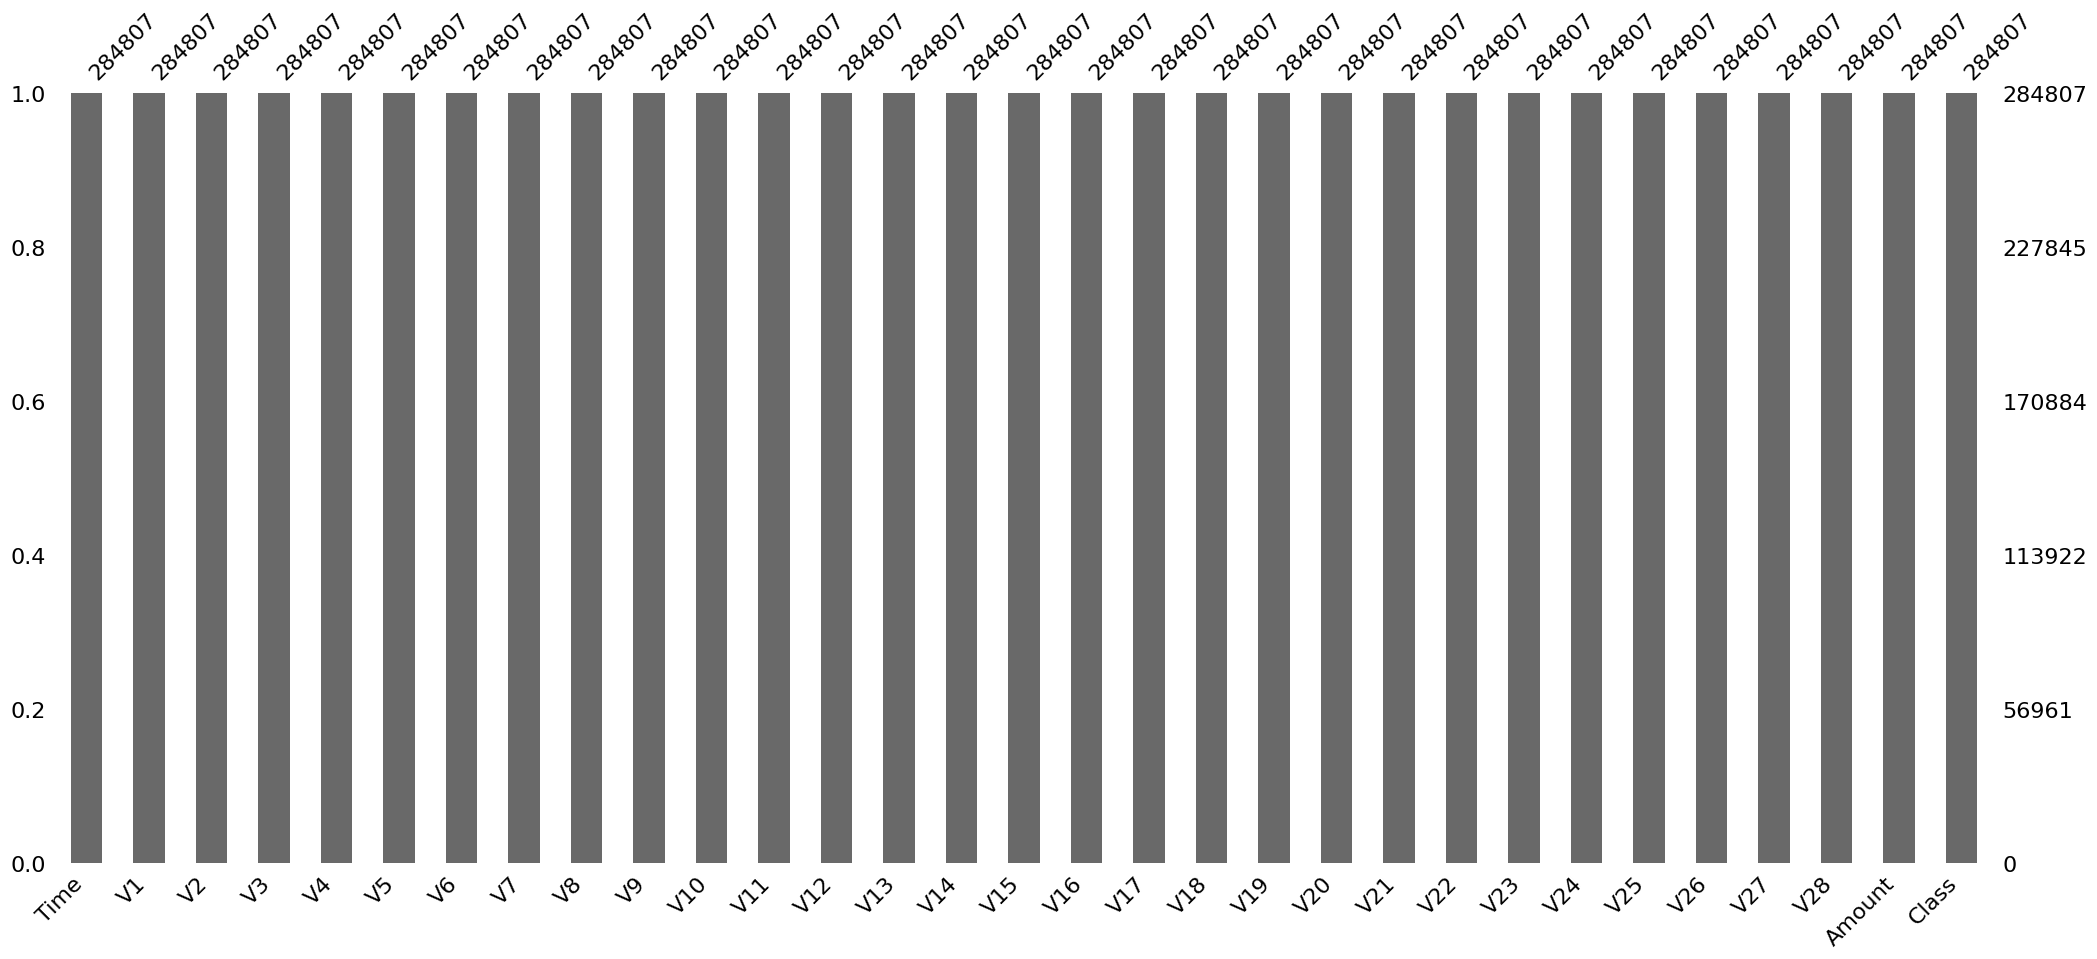

In [9]:
import missingno as msno
import matplotlib.pyplot as plt

# Visualizing the null values for each attribute
msno.bar(df)
plt.show()

In [10]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [11]:
lst = df.columns

### Plotting Histograms with Logarithmic Scale

The above code iterates through each column in `lst[1:]`, generating histograms of the data with 50 bins. The y-axis is set to a logarithmic scale to better handle wide-ranging data. The figure size is reduced to make the plots smaller, and each histogram is shown with a corresponding title representing the column name.

Width of each bin is = (max value of data – min value of data) / total number of bins 


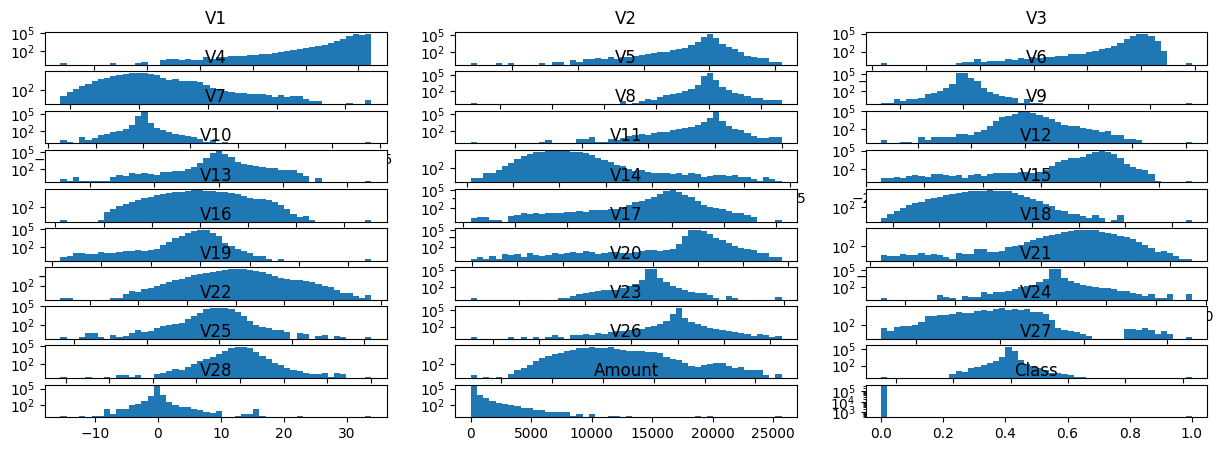

In [53]:
# Iterating through all the columns in lst[1:]
# for i in lst[1:]:
#     plt.figure(figsize=(5, 4))  # Adjust the size to make the plots smaller
#     df[i].hist(bins=50)
#     plt.yscale('log')  # Set the y-axis to logarithmic scale
#     plt.title(i)
#     plt.show()


# For better look
# Create a 3-column grid for the subplots
fig, axes = plt.subplots(nrows=(len(lst[1:]) + 2) // 3, ncols=3, figsize=(15, 5))

# Flatten axes to make iteration easier
axes = axes.flatten()

# Plot histograms
for i, ax in zip(lst[1:], axes):
    ax.hist(df[i], bins=50)
    ax.set_yscale('log')
    ax.set_title(i)

# Hide any unused subplots
for j in range(len(lst[1:]), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


In [13]:
df.drop(columns=['Time','Class']) 

# dropping time,id columns

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,...,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00


### Correlation Heatmap

The above code generates a heatmap to visualize the correlation between different features in the dataset. The following parameters are used:
- **figsize**: Sets the size of the figure.
- **cmap**: Specifies the color map used to represent the correlation values. "PiYG" stands for a pink-to-green color scale.
- **annot**: Displays the correlation values inside the cells of the heatmap.
- **fmt**: Formats the numbers in each cell to two decimal places.
- **linewidths**: Sets the width of the lines separating each cell.

This heatmap helps in understanding the relationships between variables.


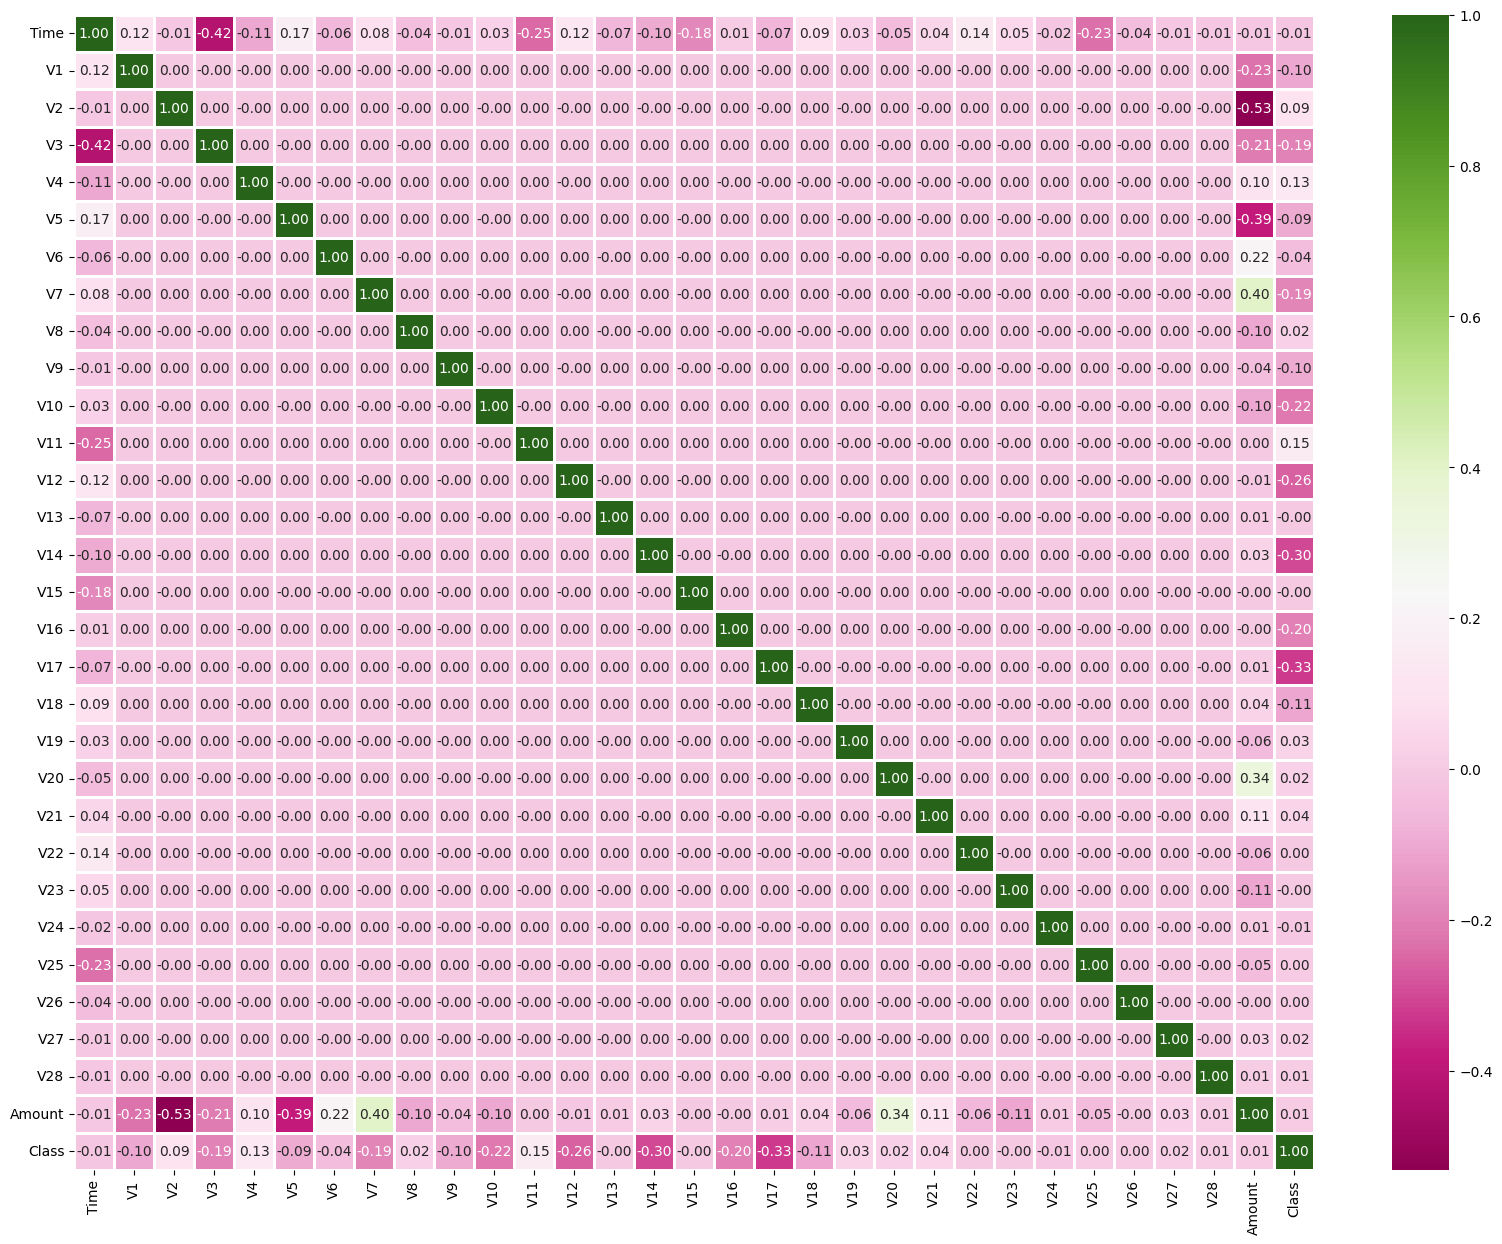

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation Heatmap
plt.figure(figsize=(20, 15))  # Setting the figure size
sns.heatmap(df.corr(), cmap='PiYG', annot=True, linewidths=1, fmt='0.2f')

# Display the heatmap
plt.show()

In [15]:
#  create dataset

X = df.iloc[:,:-1] #independent Variable

y = df.iloc[:,-1] #dependent Variable

In [16]:
y

0         0
1         0
2         0
3         0
4         0
         ..
284802    0
284803    0
284804    0
284805    0
284806    0
Name: Class, Length: 284807, dtype: int64

### Countplot and Counter

The above code demonstrates two techniques to analyze the distribution of observations in the "Class" feature:
1. **Countplot**: The `sns.countplot()` function is used to display the number of observations in each category (Fraud vs. Not Fraud) using bars.
   - The x-axis represents the 'Class' feature, and the y-axis represents the count of occurrences.
   
2. **Counter**: The `Counter()` function is used from the `collections` module to count the occurrences of each unique value in the 'Class' feature. 
   - The output shows the number of instances for each category (Fraud and Not Fraud):
     - **Not Fraud (0)**: 284,315 observations
     - **Fraud (1)**: 492 observations


Counter({0: 284315, 1: 492})


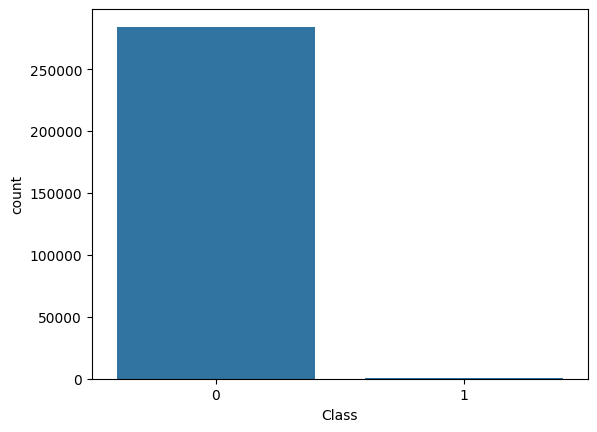

In [17]:
import seaborn as sns
from collections import Counter

# Countplot for the 'Class' feature
sns.countplot(x='Class', data=df)

# Display the counts using Counter
counter = Counter(df['Class'])
print(counter)

# Mapping the values
# 1 ------->    Fraud
# 0 ------->   Not Fraud

### Train-Test Split

In this code, we are splitting the dataset into training and testing sets. The `train_test_split` function from `sklearn.model_selection` is used for this purpose. 

#### Parameters:
- **test_size=0.2**: This defines the proportion of the data that will be used for testing (20% of the data will be used for testing, and 80% will be used for training).
- **np.random.seed(1001)**: Ensures that the random splits are reproducible across multiple executions of the code on the same machine.

This is a common practice in machine learning to ensure the model can generalize well and evaluate its performance on unseen data.


In [18]:
import numpy as np
from sklearn.model_selection import train_test_split

# Setting the random seed for reproducibility
np.random.seed(1001)

# Splitting the dataset into training and testing sets (80% train, 20% test)
x_train, x_test, y_train, y_test = train_test_split(df, y, test_size=0.2)

In [19]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((227845, 31), (56962, 31), (227845,), (56962,))

# K-Nearest Neighbors (KNN) Classifier

In this code, we are training a KNN classifier using the `KNeighborsClassifier` from `sklearn.neighbors`. The classifier will find the nearest neighbors based on the **Minkowski distance**.

### Parameters:
- **n_neighbors=5**: The number of neighbors to consider when making a prediction for each observation (in this case, 5 neighbors).
- **metric='minkowski'**: The distance metric used to find the nearest neighbors. Minkowski distance generalizes both the **Euclidean** (when `p=2`) and **Manhattan** (when `p=1`) distances.
- **p=2**: The power parameter for the Minkowski distance. When `p=2`, this corresponds to the **Euclidean distance**.

The model will be trained on the provided dataset and can then be used to classify new data based on the 5 nearest neighbors.

In [20]:
from sklearn.neighbors import KNeighborsClassifier

# Build a model
# Find each observation's five nearest neighbors based on Minkowski distance (including itself)

# Train a KNN classifier with 5 neighbors
model = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)

# Minkowski distance is a generalization of both Euclidean (p=2) and Manhattan distance (p=1)

In [21]:
model.fit(x_train, y_train)

KNeighborsClassifier()

## Evaluation

In [22]:
#predict the model on test 
y_pred=model.predict(x_test)

#predict the models and probabilities
y_pred_proba=model.predict_proba(x_test)[:,1]

# Classification Metrics Function

The function `classification_metric` is designed to evaluate a binary classification model using various metrics. It generates the following:

- **Confusion Matrix**: A heatmap showing the performance of the model on the true vs predicted values.
- **Classification Report**: Includes precision, recall, and F1-score for each class.
- **Kappa Score**: Measures the agreement between the predicted and actual values.
- **Area Under Curve (AUC)**: Calculates the area under the ROC curve to evaluate the model's performance.
- **ROC Curve**: Plots the receiver operating characteristic (ROC) curve with False Positive Rate (FPR) vs True Positive Rate (TPR).

### Thresholding Class

The `threshold` class allows for defining a threshold (default is 0.5) and predicting whether an observation is classified as `1` or `0` based on the threshold.

The threshold value determines the cut-off point for classification in binary classification tasks. The class contains a method `predict_threshold` to classify the data point as `1` if it meets or exceeds the threshold and `0` otherwise.


In [23]:
# Import the necessary libraries for stats metrics
import numpy as np

# Importing Confusion Matrix metrics and classification reports
from sklearn.metrics import confusion_matrix, classification_report

# Importing cohen_kappa_score and roc_auc_score metrics
from sklearn.metrics import cohen_kappa_score, roc_auc_score
from sklearn.metrics import roc_curve, auc

# Importing visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Importing logloss to check for loss or difference
from sklearn.metrics import log_loss

# Creating a function named 'classification_metric'
def classification_metric(y_test, y_pred, y_prob, label, n=1, verbose=False):
    """
    Note: Only for binary classification.
    confusionmatrix(y_true, y_pred, labels=['No', 'Yes'])
    """
    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    row_sum = cm.sum(axis=0)
    cm = np.append(cm, row_sum.reshape(1, -1), axis=0)
    col_sum = cm.sum(axis=1)
    cm = np.append(cm, col_sum.reshape(-1, 1), axis=1)

    labels = label + ['Total']
    
    plt.figure(figsize=(10,6))
    # Plotting the figure size based on width and height
    
    sns.heatmap(cm, annot=True, cmap='summer', fmt='0.2f', xticklabels=labels,
                yticklabels=labels, linewidths=3, cbar=None)
    # Create a heatmap using the seaborn library with various parameters
    
    plt.xlabel('Predicted Values')
    # Plotting the values on the x-axis as Predicted values
    
    plt.ylabel('Actual Values')
    # Plotting the values on the y-axis as Actual values
    
    plt.title('Confusion Matrix')
    # Mentioning the title of the figure
    
    plt.show()
    # Show the image
    
    print('*' * 30 + ' Classification Report ' + '*' * 30 + '\n\n')
    # Print a line for styling
    
    # Create and print the classification report
    cr = classification_report(y_test, y_pred)
    print(cr)
    
    print('\n' + '*' * 36 + ' Kappa Score ' + '*' * 36 + '\n\n')
    # Print a line for styling
    
    # Kappa score
    kappa = cohen_kappa_score(y_test, y_pred) # Kappa Score
    print('Kappa Score =', kappa)
    
    print('\n' + '*' * 30 + ' Area Under Curve Score ' + '*' * 30 + '\n\n')
    # AUC score
    roc_a = roc_auc_score(y_test, y_pred) # AUC Score
    print('AUC Score =', roc_a)
    
    # ROC curve
    plt.figure(figsize=(8, 5))
    # Plotting the figure based on width and height sizes
    
    fpr, tpr, thresh = roc_curve(y_test, y_prob)
    # fpr = false positive rate
    # tpr = true positive rate
    
    plt.plot(fpr, tpr, 'r')
    print('Number of probabilities to build ROC =', len(fpr))
    if verbose:
        for i in range(len(thresh)):
            if i % n == 0:
                plt.text(fpr[i], tpr[i], '%0.2f' % thresh[i])
                plt.plot(fpr[i], tpr[i], 'v')

    plt.xlabel('False Positive Rate')
    # fpr on x-axis 
    
    plt.ylabel('True Positive Rate')
    # tpr on y-axis
    
    plt.title('Receiver Operating Characteristic')
    # Mentioning the title of the figure
    
    plt.legend(['AUC = {}'.format(roc_a)])
    # Assigning the legend to the figure
    
    plt.plot([0, 1], [0, 1], 'b--', linewidth=2.0)
    # Drawing the diagonal line for the ROC
    
    plt.grid()
    # Show grid lines on the plot
    
    plt.show()
    # Display the image
    
# A class to handle thresholding
class threshold():
    '''
    Setting up the threshold points
    '''
    def __init__(self):
        self.th = 0.5
        
    def predict_threshold(self, y):
        if y >= self.th:
            return 1
        else:
            return 0


# Calling the `classification_metric` Function

The `classification_metric` function is invoked here with the following parameters:
- `y_test`: The true labels for the test set.
- `y_pred`: The predicted labels for the test set.
- `y_pred_proba`: The predicted probabilities for each class (needed for the ROC curve).
- `['no', 'yes']`: Labels for the two classes.
- `n=1`: The interval for showing the thresholds on the ROC curve.
- `verbose=True`: A flag that allows you to visually separate logical sections of the ROC curve and display readable annotations.

This will display:
- A **Confusion Matrix** heatmap.
- A **Classification Report** showing precision, recall, and F1-score.
- The **Kappa Score** for measuring agreement.
- The **AUC Score** to evaluate the model's ROC curve.
- The **ROC Curve** with thresholds displayed at specified intervals.


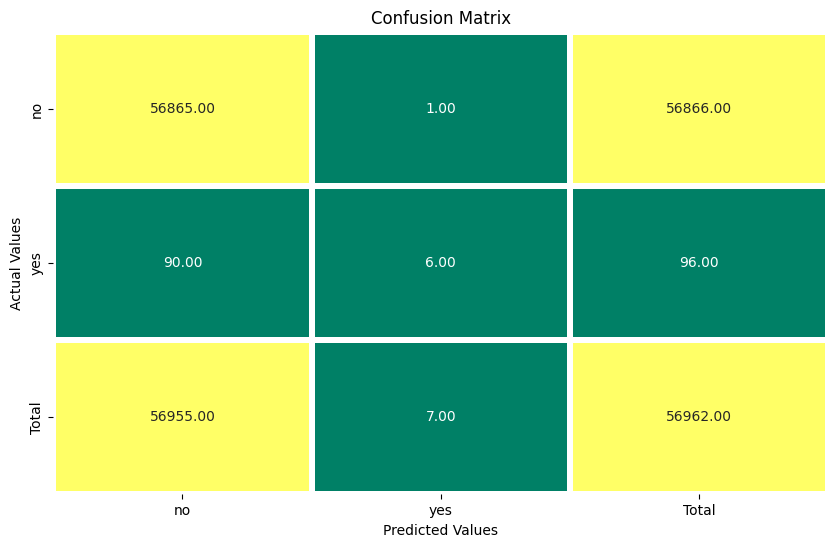

****************************** Classification Report ******************************


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.86      0.06      0.12        96

    accuracy                           1.00     56962
   macro avg       0.93      0.53      0.56     56962
weighted avg       1.00      1.00      1.00     56962


************************************ Kappa Score ************************************


Kappa Score = 0.1163024217567018

****************************** Area Under Curve Score ******************************


AUC Score = 0.5312412073998524
Number of probabilities to build ROC = 7


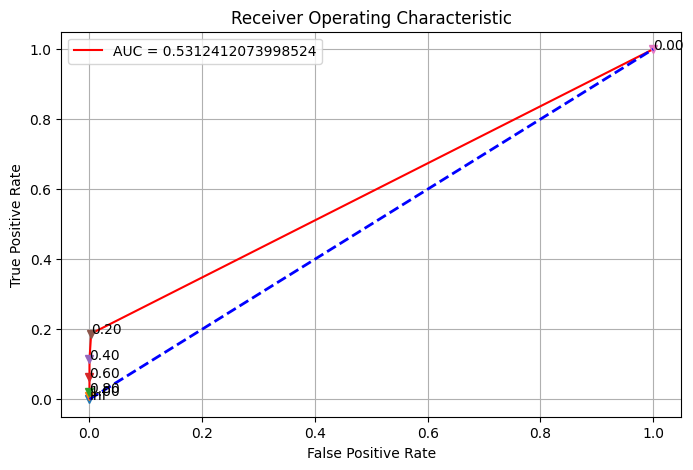

In [24]:
# Calling the Classification_metric function to display all the metrics created earlier
classification_metric(y_test, y_pred, y_pred_proba, ['no', 'yes'], n=1, verbose=True)


# Analysis of Model Evaluation Metrics

### Kappa Score and AUC Score:

- **Kappa Score**: The Kappa score obtained is 0.116, which is quite low. This indicates poor agreement between the predicted and actual classes, which is a common challenge with imbalanced datasets.
  
- **AUC Score**: The AUC score is 0.53, which is considered to be moderate. A better AUC score (closer to 1) indicates a better ability of the model to distinguish between classes.

### Why are the Scores Low?

Both the Kappa score and the AUC score are low because the dataset is **imbalanced**. In imbalanced datasets, where one class (usually the minority class) has significantly fewer instances than the other, models can be biased towards the majority class. This leads to poor predictive performance for the minority class, affecting metrics like Kappa and AUC.

### Solution: Handling Imbalanced Datasets

To improve the model's performance on imbalanced datasets, we can apply **oversampling techniques** like **SMOTE (Synthetic Minority Over-sampling Technique)**.

- **SMOTE**: SMOTE works by generating synthetic samples for the minority class based on the nearest neighbors (using K-NN). This technique helps in balancing the class distribution and improving model performance, especially in terms of recall and other metrics related to the minority class.

# SMOTE: Synthetic Minority Oversampling Technique (SMOTE)

- **SMOTE** is an oversampling technique that generates synthetic samples for the minority class in imbalanced datasets.
  
- **How SMOTE works**:
    - SMOTE focuses on the **feature space** of the minority class. It generates new instances by interpolating between the existing instances of the minority class that are close together.
    - The aim of SMOTE is to bring the minority class values (either 0 or 1, depending on the dataset) to a comparable number as the majority class, thus balancing the dataset.

- **Why use SMOTE**:
    - Random oversampling can lead to overfitting because it simply replicates the minority class samples, which might not help the model generalize well. SMOTE, however, generates new, diverse samples, which helps the model learn better and avoid overfitting.

- **Implementation**:
    - Using SMOTE from the **`imblearn`** library, we can generate synthetic data to balance the class distribution before training the model.


In [25]:
# Importing imblearn library for SMOTE
import imblearn
from imblearn.over_sampling import SMOTE

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to balance the dataset
X_train_res, y_train_res = smote.fit_resample(x_train, y_train)

# Check the class distribution after applying SMOTE
print("Before SMOTE:")
print("Class distribution in training set:", Counter(y_train))
print("\nAfter SMOTE:")
print("Class distribution in training set:", Counter(y_train_res))

Before SMOTE:
Class distribution in training set: Counter({0: 227449, 1: 396})

After SMOTE:
Class distribution in training set: Counter({0: 227449, 1: 227449})


In [26]:
#efine dataset, mentioning neighbours is 5 and fit the model
x_resample,y_resample=SMOTE(k_neighbors=5).fit_resample(df,y)

In [27]:
x_resample

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.000000,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.620000,0
1,0.000000,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.690000,0
2,1.000000,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.660000,0
3,1.000000,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.500000,0
4,2.000000,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.990000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
568625,58148.598711,-1.396534,2.950653,-1.973581,2.854183,0.935740,-1.489478,-0.879375,-0.778832,-2.372227,...,-0.162497,0.385855,-0.746480,0.030198,0.183219,-0.016805,0.234162,0.204202,3.308081,1
568626,75647.903389,-1.998945,1.364956,-1.946358,0.933010,-0.656234,-0.107713,-2.428197,-1.134449,-2.381615,...,-0.327753,0.882176,-0.220886,-0.909624,0.029645,0.089367,0.062285,0.369067,51.726430,1
568627,143007.797105,-2.069013,0.056107,-4.452041,4.050411,-0.343778,-1.122075,-3.400663,1.192106,-1.859668,...,0.624564,0.545136,0.689905,-0.057143,-0.843345,-0.493725,0.874441,0.152061,97.855985,1
568628,150138.543305,-4.613102,-0.475466,-4.704031,0.842244,-0.438683,-0.491306,-0.821211,-0.988162,-0.969033,...,0.086381,0.901343,0.148185,-0.082677,0.597931,-0.214169,0.036101,0.056877,151.739336,1


In [28]:
# Saving arrays name called credit_card_oversample
np.savez('credit_card_oversample.npz',x_resample,y_resample)

In [29]:
pd.Series(y_resample).value_counts()

Class
0    284315
1    284315
Name: count, dtype: int64

- value_counts() function returns object containing counts of unique values

In [30]:
# The data is balanced now

#load data what we balanced
data_over=np.load('credit_card_oversample.npz')
#read it
data_over.files

['arr_0', 'arr_1']

In [31]:
x_over=data_over['arr_0']   #independent variable

y_over=data_over['arr_1']   #dependent variable

In [32]:
pd.Series(y_over).value_counts()

0    284315
1    284315
Name: count, dtype: int64

In [33]:
# Now, the data is balanced, they are equal

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_over,y_over,test_size=0.2)

In [34]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((454904, 31), (113726, 31), (454904,), (113726,))

# CLASSIFICATION

In [35]:
from sklearn.neighbors import KNeighborsClassifier
model_over = KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)

In [36]:
model_over.fit(x_train,y_train)

KNeighborsClassifier()

# EVALUATION

In [37]:
y_pred=model_over.predict(x_test)
#predict the model

y_pred_prob=model_over.predict_proba(x_test)[:,1]
#predict and find probabilities

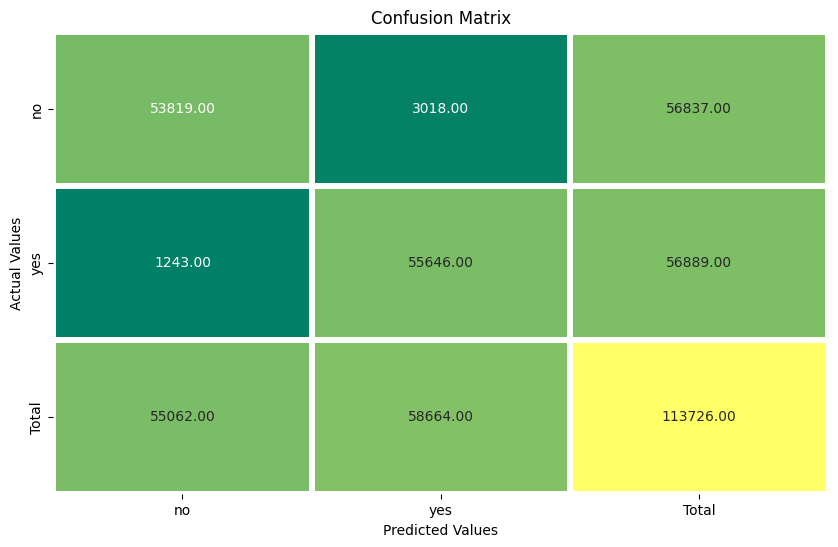

****************************** Classification Report ******************************


              precision    recall  f1-score   support

           0       0.98      0.95      0.96     56837
           1       0.95      0.98      0.96     56889

    accuracy                           0.96    113726
   macro avg       0.96      0.96      0.96    113726
weighted avg       0.96      0.96      0.96    113726


************************************ Kappa Score ************************************


Kappa Score = 0.925064423112555

****************************** Area Under Curve Score ******************************


AUC Score = 0.9625256098797297
Number of probabilities to build ROC = 7


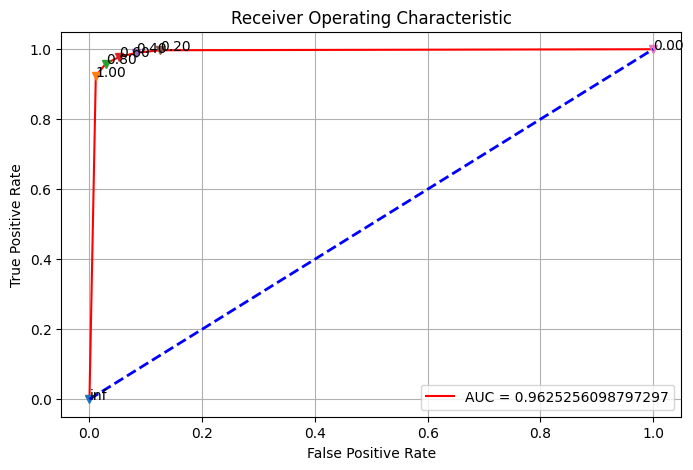

In [38]:
classification_metric(y_test,y_pred,y_pred_prob,['no','yes'],n=1,verbose=True)

# Evaluation Metrics Interpretation

- **ROC AUC Score**: The model’s ROC AUC score is 0.962, which indicates excellent performance. A score closer to 1 means that the model can differentiate between the classes effectively. In this case, the higher the ROC AUC score, the better the model's ability to classify the instances correctly.

- **Kappa Score**: The Kappa score of 0.92 indicates strong agreement between the predicted and actual values. A Kappa score close to 1 signifies that the model's predictions are highly reliable, and it is a good fit for the data.

- **AUC Score**: With an AUC score of 0.96, the model is performing very well. A score close to 1 again suggests that the model can effectively distinguish between the positive and negative classes.

- **F1 Score**: The F1 score of 96 reflects an excellent balance between precision and recall, meaning the model is achieving a good trade-off between minimizing false positives and false negatives.

## Real-Time Accuracy Consideration

- **Real-Time Accuracy** can differ from model accuracy measured during training or evaluation due to several factors:
    - **Data Quality**: In real-time, data might contain noise, missing values, or be inconsistent with the training data. This could lower the accuracy.
    - **Data Drift**: If the data distribution changes over time, the model might perform differently when exposed to new data.
    - **Feature Engineering**: In a live environment, certain features might need to be engineered or updated to improve predictions, which can affect performance.

In general, while high training accuracy is promising, real-time accuracy can vary based on how well the model generalizes to new, unseen data.


In [39]:
# For real-time evaluation, we can calculate the accuracy based on the predictions made during testing or in a real-world scenario.

from sklearn.metrics import accuracy_score

# Predict on the test set
y_test_pred = model.predict(x_test)

# Calculate accuracy
real_time_accuracy = accuracy_score(y_test, y_test_pred)
print("Real-Time Accuracy: ", real_time_accuracy)


Real-Time Accuracy:  0.5570757786258199


# K FOLD

In [40]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_over,y_over,test_size=0.2)

In [41]:
np.random.seed(101)
from sklearn.model_selection import KFold

# K-fold Cross Validation

K-fold Cross Validation (CV) is a robust technique for model evaluation that helps mitigate the issues related to training and testing data partitioning. It divides the entire dataset into `k` equal-sized folds. Each fold is used as a test set once, while the remaining `k-1` folds are used as the training set. This process is repeated `k` times, ensuring that each data point appears in the test set exactly once.

By averaging the performance metrics (such as accuracy, precision, recall, etc.) across all folds, K-fold cross-validation provides a more reliable estimate of the model's generalization performance compared to a single train-test split.

In the case of `n_splits=5`, the dataset will be split into 5 parts, and the model will train on 4 parts while testing on the remaining part. This process will be repeated 5 times, each time with a different fold as the test set.

**Key Advantages of K-fold CV:**
- **Better generalization**: It ensures that the model is evaluated on different subsets of the data.
- **Reduced variance**: The performance estimate is averaged across multiple tests, reducing the variance that might occur due to random sampling.
- **More efficient use of data**: Every data point is used for both training and testing.

In this example, `shuffle=False` is used, meaning the data will not be shuffled before splitting. This may be useful in situations where the order of the data is important (e.g., time series data).


In [42]:
# K-fold Cross Validation with 5 splits
kfold = KFold(n_splits=5, shuffle=False)

In [43]:
cross_validation=[]
for train_index,test_index in kfold.split(x_train):
    print("TRAIN:",train_index,"TEST:",test_index)
    x_train_kf,x_test_kf=x_train[train_index],x_train[test_index]
    y_train_kf,y_test_kf=y_train[train_index],y_train[test_index]
    
           # building model
    
    model_cv=KNeighborsClassifier(n_neighbors=5)
    model_cv.fit(x_train_kf,y_train_kf)
    
           # taking accuracy
    acc=round(model_cv.score(x_test_kf,y_test_kf) * 100, 2)   #round( accuracy_score(y_test, y_pred) * 100, 2 )
    cross_validation.append(acc*100)    # *100 means making percentage

TRAIN: [ 90981  90982  90983 ... 454901 454902 454903] TEST: [    0     1     2 ... 90978 90979 90980]
TRAIN: [     0      1      2 ... 454901 454902 454903] TEST: [ 90981  90982  90983 ... 181959 181960 181961]
TRAIN: [     0      1      2 ... 454901 454902 454903] TEST: [181962 181963 181964 ... 272940 272941 272942]
TRAIN: [     0      1      2 ... 454901 454902 454903] TEST: [272943 272944 272945 ... 363921 363922 363923]
TRAIN: [     0      1      2 ... 363921 363922 363923] TEST: [363924 363925 363926 ... 454901 454902 454903]


In [44]:
cross_validation  # to estimate the skill of a machine learning model on unseen data.

[9569.0, 9562.0, 9574.0, 9560.0, 9570.0]

In [45]:
# NOTE :
# We got Very good Cross validation Score

In [46]:
np.mean(cross_validation),pd.Series(cross_validation).var()
# MEAN & VARIANCE for cross_validation
# it has low variance (<10)

(9567.0, 34.0)

# Logistic Regression Model

Logistic Regression is a widely used statistical model for binary classification tasks. It predicts the probability of an outcome that can only be one of two classes, such as "Yes/No," "Pass/Fail," "Fraud/Not Fraud," etc. The model uses the independent variables (features) to estimate the probability of a certain outcome, which is then classified into one of the two categories.

### Steps to Implement Logistic Regression:
1. **Initialization**: Create a logistic regression classifier.
2. **Training**: Fit the model on the training data.
3. **Prediction**: Make predictions on the test set using the trained model.
4. **Accuracy Calculation**: Evaluate the model's performance using accuracy, comparing the predicted values (`y_pred`) against the actual values (`y_test`).

In this case, we're using the accuracy metric to evaluate the performance of the logistic regression model on the test data.

The code below demonstrates how to implement Logistic Regression for binary classification.


In [47]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression Classifier
logisreg = LogisticRegression()

# Train the model using Training Dataset
logisreg.fit(x_train, y_train)

# Prediction using test data
y_pred = logisreg.predict(x_test)

# Calculate Model accuracy by comparing y_test and y_pred
acc_logisreg = round(accuracy_score(y_test, y_pred) * 100, 2)

# Print the accuracy of the Logistic Regression model
print('Accuracy of Logistic Regression model : ', acc_logisreg)


Accuracy of Logistic Regression model :  97.48


# Gaussian Naive Bayes Model

Naive Bayes is a classification algorithm based on Bayes' theorem, which calculates the probability of a data point belonging to a specific class based on the given features. Gaussian Naive Bayes is a variant of the Naive Bayes algorithm that assumes the features follow a normal distribution.

### Steps to Implement Gaussian Naive Bayes:
1. **Initialization**: Create a Gaussian Naive Bayes classifier.
2. **Training**: Fit the model to the training data.
3. **Prediction**: Predict the class labels for the test set.
4. **Accuracy Calculation**: Compare the predicted values (`y_pred`) with the actual values (`y_test`) to calculate the accuracy of the model.

This algorithm assumes that the features in the dataset are independent of each other, which is often an oversimplification but works well in many cases.

The code below demonstrates how to implement Gaussian Naive Bayes for binary classification.


In [48]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Initialize the Gaussian Naive Bayes Classifier
model = GaussianNB()

# Train the model using Training Dataset
model.fit(x_train, y_train)

# Prediction using test data
y_pred = model.predict(x_test)

# Calculate Model accuracy by comparing y_test and y_pred
acc_ganb = round(accuracy_score(y_test, y_pred) * 100, 2)

# Print the accuracy of the Gaussian Naive Bayes model
print('Accuracy of Gaussian Naive Bayes : ', acc_ganb)


Accuracy of Gaussian Naive Bayes :  86.83


- **K-nearest neighbors (k-NN)** is a pattern recognition algorithm that uses training datasets to find the k closest relatives in future examples.
- When k-NN is used in classification, you calculate to place data within the category of its nearest neighbor. If k = 1, then it would be placed in the class nearest 1. K is classified by a plurality poll of its neighbors.

# Decision Tree Classifier

A Decision Tree is a supervised learning algorithm commonly used for both classification and regression tasks. It works by splitting the data into smaller subsets based on feature values, forming a tree-like structure. The decision-making process starts at the "root" of the tree, and the data is split at each "node" based on the best features that maximize information gain or minimize impurity.

### Key Features of Decision Trees:
1. **Binary Splits**: Each internal node in the tree represents a decision based on a feature.
2. **Leaf Nodes**: The final output category or prediction.
3. **Classification**: It's commonly used for classification tasks where the goal is to predict a categorical outcome.

The decision tree algorithm recursively partitions the dataset to create decision rules that can be followed for classification. The structure of the tree is easy to interpret, making it a useful model for problems that require explainability.

### Code Overview:
- **Initialization**: Create a DecisionTreeClassifier object.
- **Training**: Fit the model to the training data.
- **Prediction**: Predict the class labels for the test data.
- **Accuracy**: Calculate the model's accuracy by comparing predictions with actual values.

The code below demonstrates how to implement a Decision Tree Classifier for binary classification.


In [49]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Initialize the Decision Tree Classifier
model = DecisionTreeClassifier()

# Train the model using Training Dataset
model.fit(x_train, y_train)

# Prediction using test data
y_pred = model.predict(x_test)

# Calculate Model accuracy by comparing y_test and y_pred
acc_dtree = round(accuracy_score(y_test, y_pred) * 100, 2)

# Print the accuracy of the Decision Tree Classifier model
print('Accuracy of Decision Tree Classifier : ', acc_dtree)

Accuracy of Decision Tree Classifier :  100.0


# Random Forest Classifier

Random Forest is an ensemble learning method used for both classification and regression tasks. It builds a large number of decision trees during training and outputs the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees.

### Key Features of Random Forest:
1. **Ensemble of Decision Trees**: Unlike a single decision tree, Random Forest builds multiple decision trees and averages their results to improve accuracy and reduce overfitting.
2. **Randomness**: During the training process, the algorithm introduces randomness by selecting random subsets of features and data points to train each tree, making the model more robust.
3. **Robustness**: Random Forest is less prone to overfitting compared to a single decision tree because it averages out the predictions of many trees.

### Code Overview:
- **Initialization**: Create a RandomForestClassifier object.
- **Training**: Fit the model to the training data.
- **Prediction**: Predict the class labels for the test data.
- **Accuracy**: Calculate the model's accuracy by comparing predictions with actual values.

The code below demonstrates how to implement a Random Forest Classifier for binary classification.


In [50]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Initialize the Random Forest Classifier
model = RandomForestClassifier()

# Train the model using Training Dataset
model.fit(x_train, y_train)

# Prediction using test data
y_pred = model.predict(x_test)

# Calculate Model accuracy by comparing y_test and y_pred
acc_rf = round(accuracy_score(y_test, y_pred) * 100, 2)

# Print the accuracy of the Random Forest model
print('Accuracy of Random Forest : ', acc_rf)


Accuracy of Random Forest :  100.0


# Linear Discriminant Analysis (LDA)

Linear Discriminant Analysis (LDA) is a statistical technique used for dimensionality reduction and classification. It assumes that the data for each class is normally distributed and that each class has the same covariance matrix.

### Key Features of LDA:
1. **Dimensionality Reduction**: LDA projects data onto a lower-dimensional space, while maximizing class separability. This is particularly useful in high-dimensional datasets.
2. **Classification**: LDA is often used for classification tasks, as it seeks to find the optimal linear decision boundary between classes.
3. **Assumptions**: 
   - The data for each class is normally distributed.
   - Each class has the same covariance matrix (homoscedasticity).

### Code Overview:
- **Initialization**: Create a LinearDiscriminantAnalysis object.
- **Training**: Fit the model to the training data.
- **Prediction**: Predict the class labels for the test data.
- **Accuracy**: Calculate the model's accuracy by comparing predictions with actual values.

The code below demonstrates how to implement an LDA Classifier for binary classification.


In [51]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score

# Initialize the Linear Discriminant Analysis Classifier
model = LinearDiscriminantAnalysis()

# Train the model using Training Dataset
model.fit(x_train, y_train)

# Prediction using test data
y_pred = model.predict(x_test)

# Calculate Model accuracy by comparing y_test and y_pred
acc_lda = round(accuracy_score(y_test, y_pred) * 100, 2)

# Print the accuracy of the Linear Discriminant Analysis model
print('Accuracy of Linear Discriminant Analysis Classifier: ', acc_lda)


Accuracy of Linear Discriminant Analysis Classifier:  93.29


# Model Selection

After training and evaluating multiple classification models, we can compare their performance using the accuracy scores. The following code creates a dataframe with each model's accuracy score and sorts the models in descending order of their performance.

### Models Included:
- **Logistic Regression**
- **Linear Discriminant Analysis**
- **Naive Bayes**
- **Decision Tree**
- **Random Forest**
- **K-Nearest Neighbors**

### Objective:
The goal is to compare the models based on their accuracy and select the one that performs the best on the given dataset.

The code below generates a dataframe with the models and their respective accuracy scores and sorts them by accuracy.


In [52]:
# Model Selection

# Crete a dataframe with all models and score

models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Linear Discriminant Analysis','Naive Bayes', 'Decision Tree', 'Random Forest',  
              'K - Nearest Neighbors'],
    'Score': [acc_logisreg, acc_lda, acc_ganb, acc_dtree, acc_rf,  acc]})

models.sort_values(by='Score', ascending=False)

,Model,Score
3,Decision Tree,100.00
4,Random Forest,100.00
0,Logistic Regression,97.48
5,K - Nearest Neighbors,95.70
1,Linear Discriminant Analysis,93.29
2,Naive Bayes,86.83
